
üîπ Kur‚Äôan - En sƒ±k ge√ßen 10 kelime:
ve: 3303
bir: 3302
de: 2058
o: 1868
ki: 1837
allah: 1657
da: 1274
onlar: 972
i√ßin: 870
biz: 850


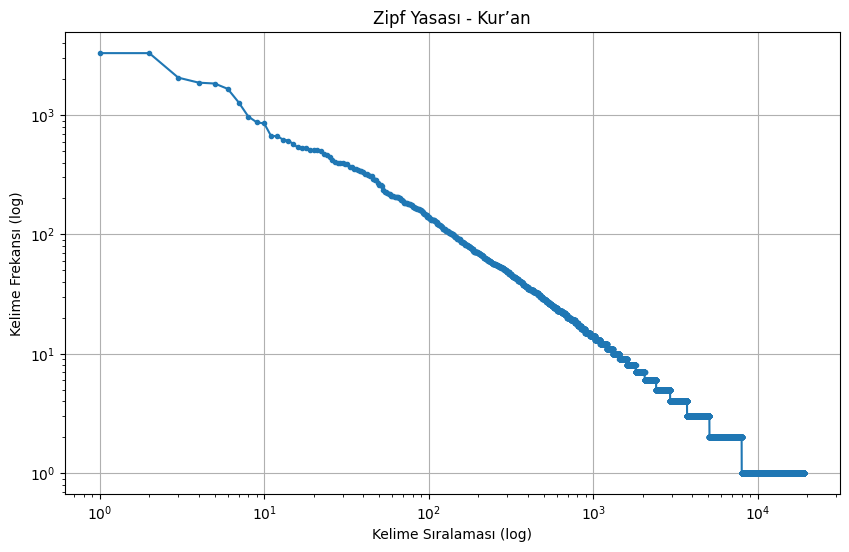


üîπ ƒ∞ncil - En sƒ±k ge√ßen 10 kelime:
isa: 960
ve: 814
bir: 791
dedi: 665
bu: 568
da: 482
i√ßin: 462
de: 431
diye: 393
o: 387


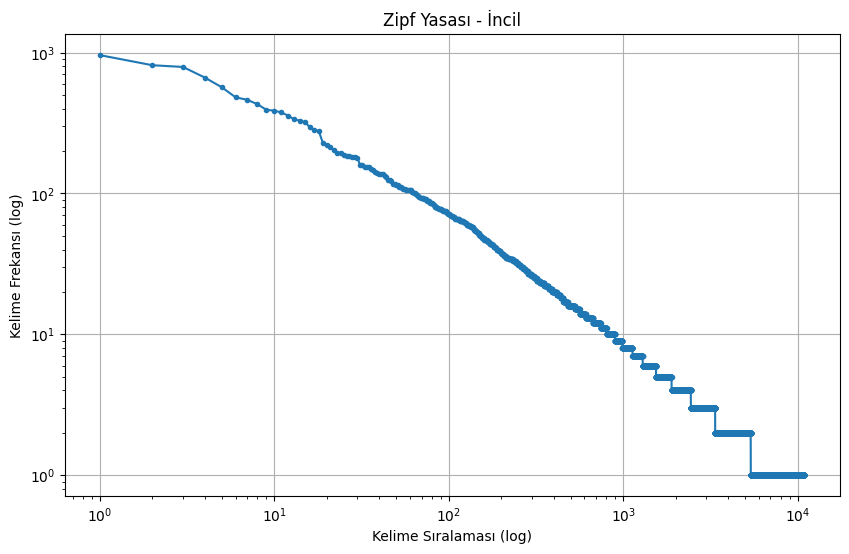

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

def zipf_analysis(file_path, label, text_column):
    df = pd.read_csv(file_path)
    text = ' '.join(df[text_column].astype(str)).lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()

    word_freq = Counter(tokens)
    sorted_freq = sorted(word_freq.values(), reverse=True)
    ranks = np.arange(1, len(sorted_freq) + 1)
    frequencies = np.array(sorted_freq)

    print(f"\nüîπ {label} - En sƒ±k ge√ßen 10 kelime:")
    for word, freq in word_freq.most_common(10):
        print(f"{word}: {freq}")

    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker=".")
    plt.title(f"Zipf Yasasƒ± - {label}")
    plt.xlabel("Kelime Sƒ±ralamasƒ± (log)")
    plt.ylabel("Kelime Frekansƒ± (log)")
    plt.grid(True)
    plt.show()

zipf_analysis("kuran_ayetleri.csv", "Kur‚Äôan", text_column="metin")
zipf_analysis("incil_ayetleri.csv", "ƒ∞ncil", text_column="ayet")


In [10]:
!pip show TurkishStemmer
!pip show stanza


Name: TurkishStemmer
Version: 1.3
Summary: Turkish Stemmer
Home-page: https://github.com/hanefi/turkish-stemmer-python
Author: Hanefi Onaldi
Author-email: abdullahanefi16@gmail.com
License: UNKNOWN
Location: c:\users\veyse\appdata\roaming\python\python310\site-packages
Requires: 
Required-by: 
Name: stanza
Version: 1.10.1
Summary: A Python NLP Library for Many Human Languages, by the Stanford NLP Group
Home-page: https://github.com/stanfordnlp/stanza
Author: Stanford Natural Language Processing Group
Author-email: jebolton@stanford.edu
License: Apache License 2.0
Location: c:\users\veyse\appdata\roaming\python\python310\site-packages
Requires: emoji, networkx, numpy, protobuf, requests, tomli, torch, tqdm
Required-by: 


In [ ]:
import pandas as pd
import re
from TurkishStemmer import TurkishStemmer
import stanza

stanza.download("tr")
nlp = stanza.Pipeline("tr", processors="tokenize,mwt,pos,lemma")

stopwords = set([
    've', 'bir', 'bu', 'ne', 'i√ßin', 'ile', 'de', 'da', 'mi', 'mu', 'mƒ±', 'm√º', 'diye',
    'o', 'ki', 'ama', 'fakat', 'ancak', 'hem', 'gibi', '≈üu', '√ßok', 'daha', 'en', 'kadar',
    'ya', 'ni√ßin', 'neden', '√ß√ºnk√º', 'lakin', 'ise', 'biz', 'siz', 'onlar', 'ben', 'sen',
    'var', 'yok', 'her', 'hi√ß', 'bazƒ±', 'kim', 'hep', 'hepsi', '≈üey', 'oldu', 'olur'
])

stemmer = TurkishStemmer()

def stem_and_clean(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords]
    stemmed = [stemmer.stem(t) for t in tokens]
    return " ".join(stemmed)

def lemmatize_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    doc = nlp(text)
    lemmas = [word.lemma for sent in doc.sentences for word in sent.words if word.lemma is not None]
    return " ".join(lemmas)

df_kuran = pd.read_csv("kuran_ayetleri.csv")
df_kuran["stemmed"] = df_kuran["metin"].apply(stem_and_clean)
df_kuran["lemmatized"] = df_kuran["metin"].apply(lemmatize_text)
df_kuran[["stemmed"]].to_csv("kuran_stemmed.csv", index=False, encoding="utf-8-sig")
df_kuran[["lemmatized"]].to_csv("kuran_lemmatized.csv", index=False, encoding="utf-8-sig")

df_incil = pd.read_csv("incil_ayetleri.csv")
df_incil["stemmed"] = df_incil["ayet"].apply(stem_and_clean)
df_incil["lemmatized"] = df_incil["ayet"].apply(lemmatize_text)
df_incil[["stemmed"]].to_csv("incil_stemmed.csv", index=False, encoding="utf-8-sig")
df_incil[["lemmatized"]].to_csv("incil_lemmatized.csv", index=False, encoding="utf-8-sig")

print("T√ºm √∂n i≈üleme i≈ülemleri tamamlandƒ±. Dosyalar kaydedildi.") 


üîπ Kur‚Äôan (Stemmed) - En sƒ±k ge√ßen 10 kelime:
allah: 3259
onlar: 1717
on: 1621
siz: 1464
kendi: 820
bun: 749
i≈ü: 638
yer: 583
olan: 574
ey: 533


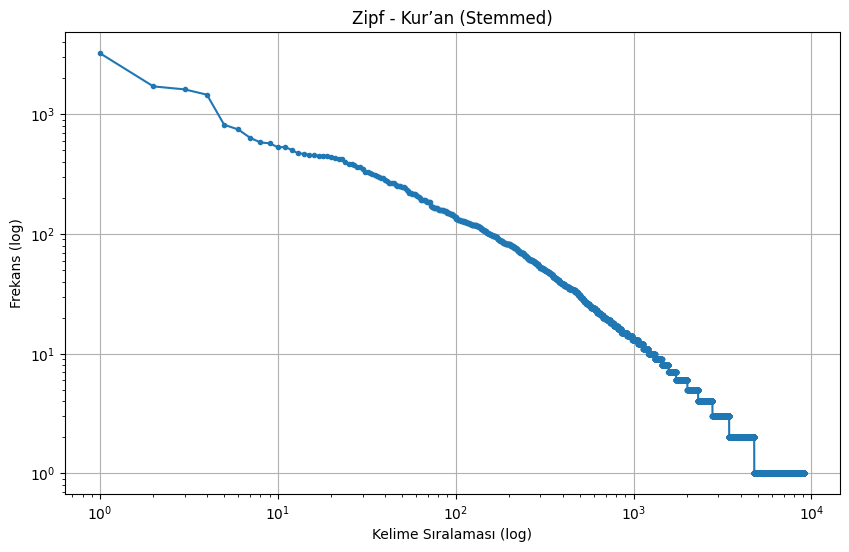


üîπ Kur‚Äôan (Lemmatized) - En sƒ±k ge√ßen 10 kelime:
o: 6254
de: 3351
bir: 3329
ve: 3303
i: 3270
et: 2223
allah: 2113
ki: 2107
siz: 1928
ol: 1873


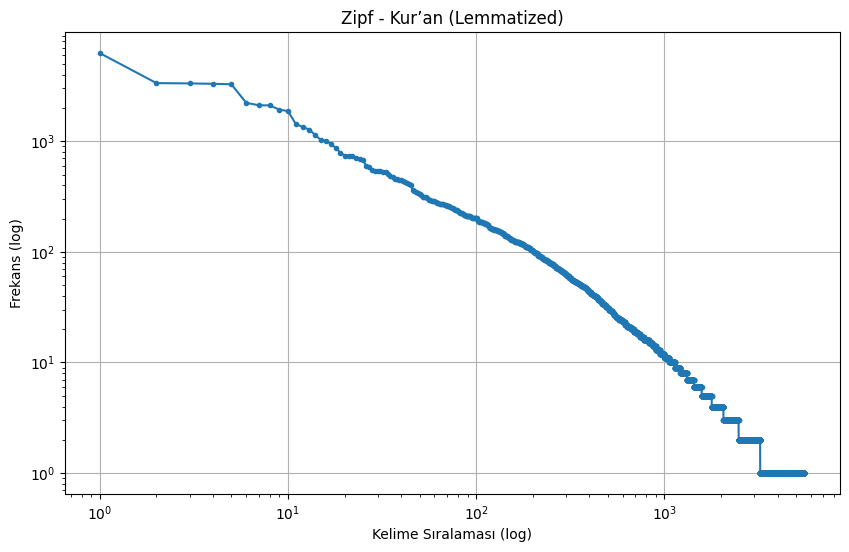


üîπ ƒ∞ncil (Stemmed) - En sƒ±k ge√ßen 10 kelime:
isa: 1141
on: 987
det: 669
siz: 546
onlar: 482
bun: 475
ben: 427
tanr: 321
kent: 285
yer: 282


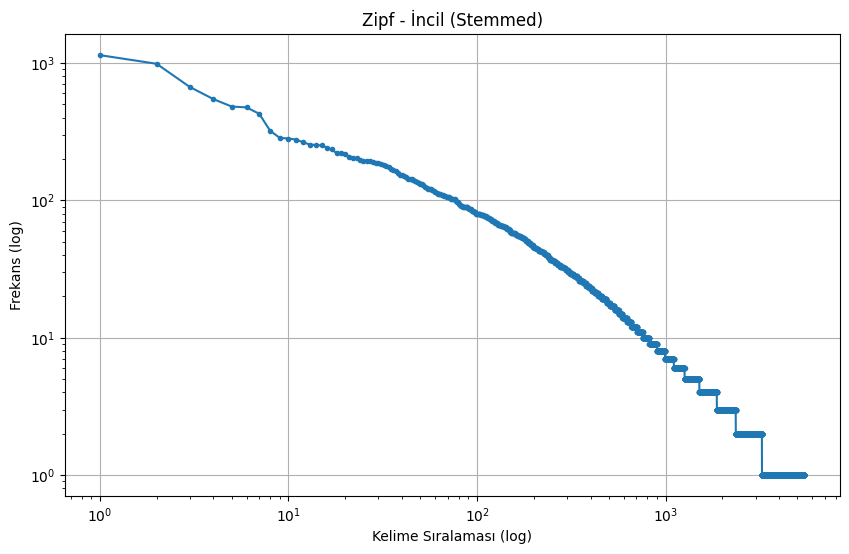


üîπ ƒ∞ncil (Lemmatized) - En sƒ±k ge√ßen 10 kelime:
o: 1928
de: 1595
bu: 1050
ol: 1041
ben: 815
ve: 814
bir: 814
i: 812
et: 727
siz: 684


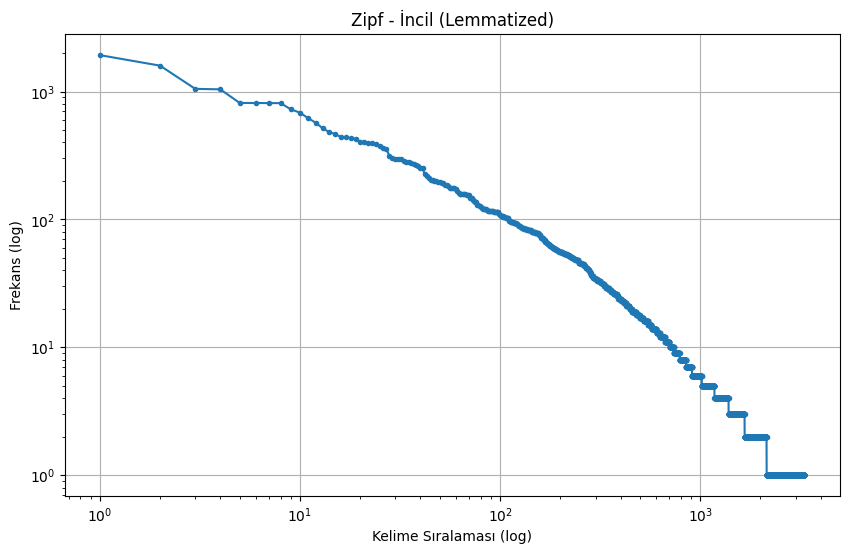

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

def zipf_from_cleaned(file_path, label):
    df = pd.read_csv(file_path)
    col_name = df.columns[0]
    text = ' '.join(df[col_name].astype(str)).lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()

    word_freq = Counter(tokens)
    sorted_freq = sorted(word_freq.values(), reverse=True)
    ranks = np.arange(1, len(sorted_freq) + 1)
    frequencies = np.array(sorted_freq)

    print(f"\nüîπ {label} - En sƒ±k ge√ßen 10 kelime:")
    for word, freq in word_freq.most_common(10):
        print(f"{word}: {freq}")

    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker=".")
    plt.title(f"Zipf - {label}")
    plt.xlabel("Kelime Sƒ±ralamasƒ± (log)")
    plt.ylabel("Frekans (log)")
    plt.grid(True)
    plt.show()

zipf_from_cleaned("kuran_stemmed.csv", "Kur‚Äôan (Stemmed)")
zipf_from_cleaned("kuran_lemmatized.csv", "Kur‚Äôan (Lemmatized)")
zipf_from_cleaned("incil_stemmed.csv", "ƒ∞ncil (Stemmed)")
zipf_from_cleaned("incil_lemmatized.csv", "ƒ∞ncil (Lemmatized)")


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorize(input_csv, output_csv):
    df = pd.read_csv(input_csv)
    column = df.columns[0]
    documents = df[column].astype(str).tolist()

    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    tfidf_df.to_csv(output_csv, index=False, encoding="utf-8-sig")
    print(f"TF-IDF tamamlandƒ± ‚Üí {output_csv}")

tfidf_vectorize("kuran_stemmed.csv", "tfidf_kuran_stemmed.csv")
tfidf_vectorize("kuran_lemmatized.csv", "tfidf_kuran_lemmatized.csv")
tfidf_vectorize("incil_stemmed.csv", "tfidf_incil_stemmed.csv")
tfidf_vectorize("incil_lemmatized.csv", "tfidf_incil_lemmatized.csv")


‚úÖ TF-IDF tamamlandƒ± ‚Üí tfidf_kuran_stemmed.csv
‚úÖ TF-IDF tamamlandƒ± ‚Üí tfidf_kuran_lemmatized.csv
‚úÖ TF-IDF tamamlandƒ± ‚Üí tfidf_incil_stemmed.csv
‚úÖ TF-IDF tamamlandƒ± ‚Üí tfidf_incil_lemmatized.csv


In [3]:
import pandas as pd
from gensim.models import Word2Vec
import os

datasets = [
    ("kuran_stemmed.csv", "kuran_stemmed"),
    ("kuran_lemmatized.csv", "kuran_lemmatized"),
    ("incil_stemmed.csv", "incil_stemmed"),
    ("incil_lemmatized.csv", "incil_lemmatized")
]

parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]

for file, label in datasets:
    df = pd.read_csv(file)
    col = df.columns[0]
    sentences = [row.split() for row in df[col].dropna()]

    for param in parameters:
        sg = 0 if param["model_type"] == "cbow" else 1
        model = Word2Vec(
            sentences,
            vector_size=param["vector_size"],
            window=param["window"],
            sg=sg,
            min_count=1,
            workers=4,
            epochs=100
        )
        name = f"{label}_{param['model_type']}_win{param['window']}_dim{param['vector_size']}.model"
        model.save(name)
        print(f" Model kaydedildi: {name}")


‚úÖ Model kaydedildi: kuran_stemmed_cbow_win2_dim100.model
‚úÖ Model kaydedildi: kuran_stemmed_skipgram_win2_dim100.model
‚úÖ Model kaydedildi: kuran_stemmed_cbow_win4_dim100.model
‚úÖ Model kaydedildi: kuran_stemmed_skipgram_win4_dim100.model
‚úÖ Model kaydedildi: kuran_stemmed_cbow_win2_dim300.model
‚úÖ Model kaydedildi: kuran_stemmed_skipgram_win2_dim300.model
‚úÖ Model kaydedildi: kuran_stemmed_cbow_win4_dim300.model
‚úÖ Model kaydedildi: kuran_stemmed_skipgram_win4_dim300.model
‚úÖ Model kaydedildi: kuran_lemmatized_cbow_win2_dim100.model
‚úÖ Model kaydedildi: kuran_lemmatized_skipgram_win2_dim100.model
‚úÖ Model kaydedildi: kuran_lemmatized_cbow_win4_dim100.model
‚úÖ Model kaydedildi: kuran_lemmatized_skipgram_win4_dim100.model
‚úÖ Model kaydedildi: kuran_lemmatized_cbow_win2_dim300.model
‚úÖ Model kaydedildi: kuran_lemmatized_skipgram_win2_dim300.model
‚úÖ Model kaydedildi: kuran_lemmatized_cbow_win4_dim300.model
‚úÖ Model kaydedildi: kuran_lemmatized_skipgram_win4_dim300.model


In [3]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv("kuran_lemmatized.csv")
tfidf = pd.read_csv("tfidf_kuran_lemmatized.csv")

giris_index = 10
giris_metni = df.iloc[giris_index]["lemmatized"]

vektorler = tfidf

sim_scores = cosine_similarity([vektorler.iloc[giris_index]], vektorler)[0]

top5 = sim_scores.argsort()[::-1][1:6]

print(f"Giri≈ü metni:\n{giris_metni}\n")
print("En benzer 5 metin:")
for i in top5:
    print(f"\nSkor: {sim_scores[i]:.4f}")
    print(df.iloc[i]["lemmatized"])


üîç Giri≈ü metni:
ve o ki hem sen indirilene iman et hem sen √∂nce in ahiret de bu kesinlik iman et

üîù En benzer 5 metin:

Skor: 0.4973
fakat o ilim derinle≈ü olan ve iman eden sen indirilene ve sen √∂nce in iman et o namaz kƒ±l zekat ver allaha ve ahiret g√ºn iman eden i i≈üte o b√ºy√ºk bir m√ºkafat ver

Skor: 0.3694
ey peygamber biz sen hem bir ≈üahit hem bir m√ºjdeci hem bir uyarƒ±cƒ± olarak g√∂nder k

Skor: 0.3657
ey muhammed sen sen √∂nce ki peygamber s√∂yle ba≈üka bir ≈üey s√∂yle ≈ü√ºphesiz ki sen rapp hem maƒüfiret sahip i hem de acƒ± ver bir azap sahip i

Skor: 0.3435
o √∂nce yok et hi√ßbir memleket halkƒ± iman et ≈üimdi bu mi iman et

Skor: 0.3388
hem o ve hem gemiye y√ºkle


In [4]:
df = pd.read_csv("kuran_stemmed.csv")
tfidf = pd.read_csv("tfidf_kuran_stemmed.csv")

giris_index = 10
giris_metni = df.iloc[giris_index]["stemmed"]

vektorler = tfidf
sim_scores = cosine_similarity([vektorler.iloc[giris_index]], vektorler)[0]

top5 = sim_scores.argsort()[::-1][1:6]
print(f"Giri≈ü metni:\n{giris_metni}\n")
print("En benzer 5 metin:")
for i in top5:
    print(f"\nSkor: {sim_scores[i]:.4f}")
    print(df.iloc[i]["stemmed"])


üîç Giri≈ü metni:
san indirilen iman eder sen √∂n√ß indirilen ahire bun kesinlik iman eder

üîù En benzer 5 metin:

Skor: 0.5423
onlar ilim derinle≈ü olan iman eden san indirilen sen √∂n√ß indirilen iman eder namaz kƒ±lan zeka veren allah ahiret g√ºn iman eden i≈ü onlar b√ºy√ºk m√ºkafat verecek

Skor: 0.3418
ey kitap ehl sade allah biz indirilen biz √∂n√ß indirilen inandƒ±k biz ho≈ülanmƒ±yor oys √ßok yol √ßƒ±kmƒ±≈ü

Skor: 0.3350
onlar allah indirt on iman et denildik zaman kent indirilen iman eder der on ba≈üka ink√¢r eder oys yan tevra tasdik e ger√ßek vahiy o onlar pek madem ger√ßek m√ºmi sizs √∂n√ß allah peygamber √∂ld√ºr√ºyor

Skor: 0.3211
i√ß zulmeden yan ehl kitap g√ºzel yol m√ºcade et dey biz indirilen siz indirilen iman et biz il√¢hƒ±mƒ±z siz il√¢hƒ±nƒ±z bir on tesl ol

Skor: 0.2992
elif l√¢m m√Æm ra i≈ü bun san kitap √¢yetleridir san rabbin indirilen hak l√¢kin insan √ßok iman etmez


In [5]:
df = pd.read_csv("incil_lemmatized.csv")
tfidf = pd.read_csv("tfidf_incil_lemmatized.csv")

giris_index = 10
giris_metni = df.iloc[giris_index]["lemmatized"]

vektorler = tfidf
sim_scores = cosine_similarity([vektorler.iloc[giris_index]], vektorler)[0]

top5 = sim_scores.argsort()[::-1][1:6]
print(f"Giri≈ü metni:\n{giris_metni}\n")
print("En benzer 5 metin:")
for i in top5:
    print(f"\nSkor: {sim_scores[i]:.4f}")
    print(df.iloc[i]["lemmatized"])


üîç Giri≈ü metni:
kendi yurt gel ama kendi halkƒ± o kabul et

üîù En benzer 5 metin:

Skor: 0.4217
ben baba ad gel ama ben kabul et oysa ba≈üka biri kendi ad gel o kabul et

Skor: 0.3703
siz kabul et ben kabul et ol ben kabul et de ben g√∂ndere kabul et ol

Skor: 0.3404
insan d√º≈üman kendi ev halkƒ± ol

Skor: 0.3300
siz doƒüru s√∂yle ben g√∂nder herhangi bir kimse kabul et ben kabul et ol ben kabul et de ben g√∂ndere kabul et ol

Skor: 0.3136
kendi kabul et ad iman et hepsi tanrƒ± √ßocuk ol hak ver


In [6]:
df = pd.read_csv("incil_stemmed.csv")
tfidf = pd.read_csv("tfidf_incil_stemmed.csv")

giris_index = 10
giris_metni = df.iloc[giris_index]["stemmed"]

vektorler = tfidf
sim_scores = cosine_similarity([vektorler.iloc[giris_index]], vektorler)[0]

top5 = sim_scores.argsort()[::-1][1:6]
print(f"üîç Giri≈ü metni:\n{giris_metni}\n")
print("üîù En benzer 5 metin:")
for i in top5:
    print(f"\nSkor: {sim_scores[i]:.4f}")
    print(df.iloc[i]["stemmed"])


üîç Giri≈ü metni:
kent yurt gelt kent halk on kabul etme

üîù En benzer 5 metin:

Skor: 0.3255
baba adƒ±n gelt ben kabul etmiyor oys ba≈üka biri kent adƒ±n gelir on kabul edecek

Skor: 0.2809
herkes yazƒ±lmak kent kent git

Skor: 0.2751
siz kabul e ben kabul et ben kabul e ben g√∂nderen kabul et

Skor: 0.2698
samiriye isay kabul etme yeru≈üalim doƒür gidiyor

Skor: 0.2497
b√ºt√ºn kent halk kapƒ± toplanmƒ±≈ü


In [1]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import os

model_files = [
    "kuran_stemmed_cbow_win2_dim100.model",
    "kuran_stemmed_skipgram_win2_dim100.model",
    "kuran_stemmed_cbow_win4_dim100.model",
    "kuran_stemmed_skipgram_win4_dim100.model",
    "kuran_stemmed_cbow_win2_dim300.model",
    "kuran_stemmed_skipgram_win2_dim300.model",
    "kuran_stemmed_cbow_win4_dim300.model",
    "kuran_stemmed_skipgram_win4_dim300.model",
    "kuran_lemmatized_cbow_win2_dim100.model",
    "kuran_lemmatized_skipgram_win2_dim100.model",
    "kuran_lemmatized_cbow_win4_dim100.model",
    "kuran_lemmatized_skipgram_win4_dim100.model",
    "kuran_lemmatized_cbow_win2_dim300.model",
    "kuran_lemmatized_skipgram_win2_dim300.model",
    "kuran_lemmatized_cbow_win4_dim300.model",
    "kuran_lemmatized_skipgram_win4_dim300.model",
    "incil_stemmed_cbow_win2_dim100.model",
    "incil_stemmed_skipgram_win2_dim100.model",
    "incil_stemmed_cbow_win4_dim100.model",
    "incil_stemmed_skipgram_win4_dim100.model",
    "incil_stemmed_cbow_win2_dim300.model",
    "incil_stemmed_skipgram_win2_dim300.model",
    "incil_stemmed_cbow_win4_dim300.model",
    "incil_stemmed_skipgram_win4_dim300.model",
    "incil_lemmatized_cbow_win2_dim100.model",
    "incil_lemmatized_skipgram_win2_dim100.model",
    "incil_lemmatized_cbow_win4_dim100.model",
    "incil_lemmatized_skipgram_win4_dim100.model",
    "incil_lemmatized_cbow_win2_dim300.model",
    "incil_lemmatized_skipgram_win2_dim300.model",
    "incil_lemmatized_cbow_win4_dim300.model",
    "incil_lemmatized_skipgram_win4_dim300.model"
]

giris_index = 10

def average_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

output_lines = []

for model_file in model_files:
    try:
        model = Word2Vec.load(model_file)

        if "kuran_lemmatized" in model_file:
            df = pd.read_csv("kuran_lemmatized.csv")
            col = "lemmatized"
        elif "kuran_stemmed" in model_file:
            df = pd.read_csv("kuran_stemmed.csv")
            col = "stemmed"
        elif "incil_lemmatized" in model_file:
            df = pd.read_csv("incil_lemmatized.csv")
            col = "lemmatized"
        elif "incil_stemmed" in model_file:
            df = pd.read_csv("incil_stemmed.csv")
            col = "stemmed"
        else:
            continue

        sentences = df[col].astype(str).apply(str.split).tolist()

        giris_tokens = sentences[giris_index]
        giris_vector = average_vector(giris_tokens, model)
        all_vectors = [average_vector(s, model) for s in sentences]
        sim_scores = cosine_similarity([giris_vector], all_vectors)[0]
        top5 = sim_scores.argsort()[::-1][1:6]

        print(f"\n\n MODEL: {model_file}")
        print(f" Giri≈ü metni: {' '.join(giris_tokens)}\n")
        print("En benzer 5 c√ºmle:")
        
        output_lines.append(f"\n\n MODEL: {model_file}")
        output_lines.append(f" Giri≈ü metni: {' '.join(giris_tokens)}\n")
        output_lines.append(" En benzer 5 c√ºmle:")

        for i in top5:
            score = f"Skor: {sim_scores[i]:.4f}"
            cumle = " ".join(sentences[i])
            print(f"\n{score}\n{cumle}")
            output_lines.append(f"\n{score}")
            output_lines.append(cumle)

    except Exception as e:
        print(f" HATA {model_file}: {str(e)}")
        output_lines.append(f" HATA {model_file}: {str(e)}")

with open("word2vec_benzerlik_sonuclari.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(output_lines))




üìå MODEL: kuran_stemmed_cbow_win2_dim100.model
üîç Giri≈ü metni: san indirilen iman eder sen √∂n√ß indirilen ahire bun kesinlik iman eder

üîù En benzer 5 c√ºmle:

Skor: 0.8205
onlar ilim derinle≈ü olan iman eden san indirilen sen √∂n√ß indirilen iman eder namaz kƒ±lan zeka veren allah ahiret g√ºn iman eden i≈ü onlar b√ºy√ºk m√ºkafat verecek

Skor: 0.8001
onlar allah indirt on iman et denildik zaman kent indirilen iman eder der on ba≈üka ink√¢r eder oys yan tevra tasdik e ger√ßek vahiy o onlar pek madem ger√ßek m√ºmi sizs √∂n√ß allah peygamber √∂ld√ºr√ºyor

Skor: 0.7794
on kur√¢ndan √∂n√ß kendi kitap verdik on iman eder

Skor: 0.7774
elif l√¢m m√Æm ra i≈ü bun san kitap √¢yetleridir san rabbin indirilen hak l√¢kin insan √ßok iman etmez

Skor: 0.7760
kendi kitap verdik san indirilen vahiy le sevin√ß duyuyor bun beraber hiziple≈üen √¢yetlerin kƒ±sm ink√¢r eden var allah kulluk etmek on ≈üirk ko≈ümamak emrol on davet ediyor d√∂n√º≈ü ona


üìå MODEL: kuran_stemmed_skipgram_win2_dim10

In [6]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from gensim.models import Word2Vec

model_files = [
    "kuran_stemmed_cbow_win2_dim100.model",
    "kuran_stemmed_skipgram_win2_dim100.model",
    "kuran_stemmed_cbow_win4_dim100.model",
    "kuran_stemmed_skipgram_win4_dim100.model",
    "kuran_stemmed_cbow_win2_dim300.model",
    "kuran_stemmed_skipgram_win2_dim300.model",
    "kuran_stemmed_cbow_win4_dim300.model",
    "kuran_stemmed_skipgram_win4_dim300.model",
    "kuran_lemmatized_cbow_win2_dim100.model",
    "kuran_lemmatized_skipgram_win2_dim100.model",
    "kuran_lemmatized_cbow_win4_dim100.model",
    "kuran_lemmatized_skipgram_win4_dim100.model",
    "kuran_lemmatized_cbow_win2_dim300.model",
    "kuran_lemmatized_skipgram_win2_dim300.model",
    "kuran_lemmatized_cbow_win4_dim300.model",
    "kuran_lemmatized_skipgram_win4_dim300.model",
    "incil_stemmed_cbow_win2_dim100.model",
    "incil_stemmed_skipgram_win2_dim100.model",
    "incil_stemmed_cbow_win4_dim100.model",
    "incil_stemmed_skipgram_win4_dim100.model",
    "incil_stemmed_cbow_win2_dim300.model",
    "incil_stemmed_skipgram_win2_dim300.model",
    "incil_stemmed_cbow_win4_dim300.model",
    "incil_stemmed_skipgram_win4_dim300.model",
    "incil_lemmatized_cbow_win2_dim100.model",
    "incil_lemmatized_skipgram_win2_dim100.model",
    "incil_lemmatized_cbow_win4_dim100.model",
    "incil_lemmatized_skipgram_win4_dim100.model",
    "incil_lemmatized_cbow_win2_dim300.model",
    "incil_lemmatized_skipgram_win2_dim300.model",
    "incil_lemmatized_cbow_win4_dim300.model",
    "incil_lemmatized_skipgram_win4_dim300.model"
]

giris_index = 10

def average_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

model_top5_indices = {}

for model_file in model_files:
    try:
        model = Word2Vec.load(model_file)

        if "kuran_lemmatized" in model_file:
            df = pd.read_csv("kuran_lemmatized.csv")
            col = "lemmatized"
        elif "kuran_stemmed" in model_file:
            df = pd.read_csv("kuran_stemmed.csv")
            col = "stemmed"
        elif "incil_lemmatized" in model_file:
            df = pd.read_csv("incil_lemmatized.csv")
            col = "lemmatized"
        elif "incil_stemmed" in model_file:
            df = pd.read_csv("incil_stemmed.csv")
            col = "stemmed"
        else:
            continue

        sentences = df[col].astype(str).apply(str.split).tolist()
        giris_vector = average_vector(sentences[giris_index], model)
        all_vectors = [average_vector(s, model) for s in sentences]
        sim_scores = cosine_similarity([giris_vector], all_vectors)[0]
        top5 = sim_scores.argsort()[::-1][1:6]

        model_name = model_file.replace(".model", "")
        model_top5_indices[model_name] = list(top5)

    except Exception as e:
        print(f"HATA ({model_file}): {e}")

model_names = list(model_top5_indices.keys())
n = len(model_names)
jaccard_matrix = pd.DataFrame(index=model_names, columns=model_names, dtype=float)

for i in range(n):
    for j in range(n):
        set1 = set(model_top5_indices[model_names[i]])
        set2 = set(model_top5_indices[model_names[j]])
        jaccard = len(set1 & set2) / len(set1 | set2) if set1 | set2 else 0.0
        jaccard_matrix.iloc[i, j] = jaccard

jaccard_matrix.to_excel("jaccard_benzerlik_matris.xlsx")

print("Jaccard benzerlik matrisi 'jaccard_benzerlik_matris.xlsx' olarak kaydedildi.")


‚úÖ Jaccard benzerlik matrisi 'jaccard_benzerlik_matris.xlsx' olarak kaydedildi.
